<a href="https://colab.research.google.com/github/MxD-lab/SNN_Simulation/blob/neralnetwork/neralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# -*- coding: utf-8 -*-
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import numpy 



In [2]:
#シグモイド関数（出力層）
def sigmoid(x):
  return 1/(1+np.exp(-x))

#ReLU関数（隠れ層）
def relu(x):
  return np.maximum(0,x)

In [3]:
#交差エントロピー誤差

def cross_entropy_error(y,t):
  delta:float
  delta = 1e-7
  return -np.sum(t*np.log(y+delta))

In [59]:
"""
重み、バイアス、初期設定
W1：隠れ層の重み
B1:隠れ層のバイアス
W2:出力層の重み
B2:隠れ層のバイアス
"""
W1 = np.random.rand(2,3)
B1 = np.random.rand(3)
W2 = np.random.rand(3,1)
B2 = np.random.rand(1)

In [60]:
#活性化関数の微分(relu)u:隠れ層の活性
def relu_diff(u):
  d = np.zeros_like(u) #xと同じ形状の配列を作成
  for i in range(len(u)):
    for j in range(len(u[0])):
      if u[i][j]>0:
        d[i] = 1
      else: 
        d[i][j] = 0

  return d

In [61]:
#隠れ層の誤差
"""
delta:一個前の誤差（出力層の誤差）
w:一個前の重み（出力層の重み）
activ:活性化関数の微分
"""
def hidden_delta(delta,w,activ):
  d = np.zeros((4,3)) #データ数×隠れ層のニューロン数の配列を作成
  #d = np.zeros((int(delta),int(w[0])))
  for i in range(len(delta)):
    for j in range(len(w[0])):
      d[i][j] = delta[i]*w[j]*activ[i][j]
  return np.array(d)
  

In [69]:
i = 0
y = np.zeros(100)
for i in range(0,99):
  N = 4#データ数(ミニバッチ)
  x = np.array([[0,0],[1,1],[0,1],[1,0]])#入力
  target =  np.array([[0],[0],[1],[1]]) #教師
  learning_rate = 0.5#学習率

  A1 = np.dot(x,W1)+B1
  Z1 = relu(A1)#一層目活性化関数かける
  A2 = np.dot(Z1,W2) + B2
  Z2 = sigmoid(A2)

  #print(Z2)
  y[i] = cross_entropy_error(Z2,target)#出力層の損失関数
  #print(y)

  ###出力層の逆伝搬
  ##重み
  delta = Z2 - target#誤差
  #print(Z2)
  #print(delta)
  Z1_t = np.transpose(Z1)
  sum_delta = np.dot(Z1_t,delta)
  #print(sum_delta)
  delta_out = 1/N*sum_delta
  #print(delta_out)
  W2 = W2 - learning_rate*delta_out
  #print(W2)


  ##バイアス
  a = np.array([1,1,1,1])
  sum_delta_bias = np.dot(a,delta)
  delta_out_bias = 1/N*sum_delta_bias
  #print(delta_out_bias)
  #print(B2)
  B2 = B2 - learning_rate*delta_out_bias
  #print(B2)

  ###隠れ層の逆伝搬
  ##重み
  differential_y = relu_diff(A1)#活性化関数の微分
  #print(differential_y)
  hid_delta = hidden_delta(delta,W2,differential_y)
  #print(hid_delta)
  x_t = np.transpose(x)
  delta_hidden = 1/N*np.dot(x_t,hid_delta)
  W1 = W1 - learning_rate*delta_hidden

  ##バイアス
  a2 = np.array([1,1,1,1])
  delta_hidden_bias = 1/N*np.dot(a2,hid_delta)
  #print(B1)
  B1 = B1 - learning_rate*delta_hidden_bias
  #print(B1)




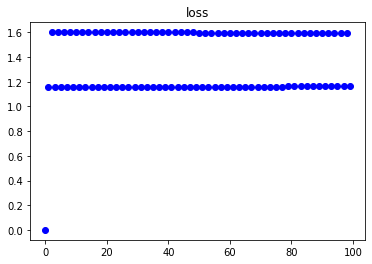

In [68]:
x = np.arange(100)
plt.scatter(x, L, c='b', label='loss_data')
#plt.legend()
plt.title('loss')
plt.show()

In [31]:
A1 = np.dot(x,W1)+B1
Z1 = relu(A1)#一層目活性化関数かける
A2 = np.dot(Z1,W2) + B2
Z2 = sigmoid(A2)
print

[[0.4946311 ]
 [0.49335931]
 [0.50595003]
 [0.50619338]]
